## TADs detection

__running time__: < 25 min

In this notebook we will detect TAD borders in chromosome 3 at 50kbp resolution.
We use `tadbit segment` with the `--only_tads` flag. The tool will call internally the detection algorithm named also TADbit. The TADbit algorithm is a breakpoint detection algorithm that returns the optimal segmentation of the chromosome under BIC-penalized likelihood. The model assumes that counts have a Poisson distribution and that the expected value of the counts decreases like a power-law with the linear distance on the chromosome.

#### Mouse B cells

In [1]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-10-06 13:28:26]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-10-06 13:28:30]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-10-06 13:28:31]
      -> too few interactions defined as less than       100 interactions
      -> removed 64 columns (62/64 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-10-06 13:28:31]
  - Vanilla normalization                                                      [2021-10-06 13:28:31]
  - Getting sum of normalized bins                                             

In [2]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 50kb

  (Matrix size 3195x3195)                                                      [2021-10-06 13:28:45]

  - Parsing BAM (100 chunks)                                                   [2021-10-06 13:28:45]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-10-06 13:28:52]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching TADs
  - chr3
,-------.
| PATHs |
,----.-------.--------------------------------------------------------------------------------.--------------.
| Id | JOBid |                                                                           Path |         Type |
|----+-------+---------------------------------

Results are stored in the `06_segmentation/tads_50kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the TADs for each processed chromosome.

In [3]:
%%bash

ls ../results/B_rep1/06_segmentation/tads_50kb/

chr3_e0b2edc568.tsv


In [4]:
%%bash

cat ../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv

#	start	end	score	density
1	1	64	3.0	0.009
2	65	70	4.0	1.03
3	71	90	3.0	0.974
4	91	108	4.0	0.952
5	109	113	3.0	1.137
6	114	147	9.0	0.986
7	148	158	4.0	0.79
8	159	163	6.0	1.145
9	164	172	6.0	0.837
10	173	179	9.0	1.047
11	180	209	10.0	1.499
12	210	283	2.0	1.085
13	284	288	4.0	1.021
14	289	326	6.0	1.272
15	327	331	5.0	0.697
16	332	356	3.0	0.989
17	357	361	3.0	0.724
18	362	384	10.0	1.069
19	385	406	5.0	1.065
20	407	412	10.0	0.914
21	413	441	9.0	1.091
22	442	447	6.0	1.079
23	448	537	9.0	1.099
24	538	542	10.0	0.786
25	543	578	8.0	1.07
26	579	583	8.0	0.615
27	584	612	9.0	0.911
28	613	625	7.0	1.231
29	626	630	5.0	0.917
30	631	636	4.0	0.68
31	637	642	3.0	0.816
32	643	647	10.0	0.85
33	648	656	9.0	1.236
34	657	714	10.0	0.92
35	715	723	5.0	1.432
36	724	732	8.0	0.952
37	733	749	7.0	1.261
38	750	766	10.0	1.557
39	767	779	9.0	1.038
40	780	811	10.0	0.959
41	812	837	10.0	1.067
42	838	1022	7.0	1.075
43	1023	1027	4.0	1.455
44	1028	1043	4.0	1.689
45	1044	1057	4.0	1.933
46	1058	1068	10.0	1.448
47	1069	1094

The main output of the tool is a text file with the information of each identified TAD. The file contains: the starting and ending bins in the matrix, a score from 1 to 10 of the statistical robustness or confidence of the boundary and the density. The density is the relative amount of interactions in this TAD. If this relative amount of interactions is higher than 1 the number of interactions inside the TAD is higher than expected according to its size.

We can plot the TADs in the region of chromosome 3 that contains the Sox2 locus (chr3:33950000-35450000) using the `tadbit bin` tool and the `--tad_def` option.

In [5]:
%%bash

tadbit bin -w ../results/B_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def ../results/B_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv


Extraction of chr3:35000000-41000000
Getting raw matrices                                                           [2021-10-06 13:40:27]

  (Matrix size 120x120)                                                        [2021-10-06 13:40:27]

  - Parsing BAM (60 chunks)                                                    [2021-10-06 13:40:27]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

  - Getting matrices                                                           [2021-10-06 13:40:27]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

 - Plotting: raw                                                               [2021-10-06 13:40:27]
Cleaning                                                                       [2021-10-06 13:40:28]
Saving to DB                                                        

In [6]:
%%bash

ls ../results/B_rep1/05_sub-matrices/

raw_chr3:700-820_50kb_c502e7ddb3_tri.png


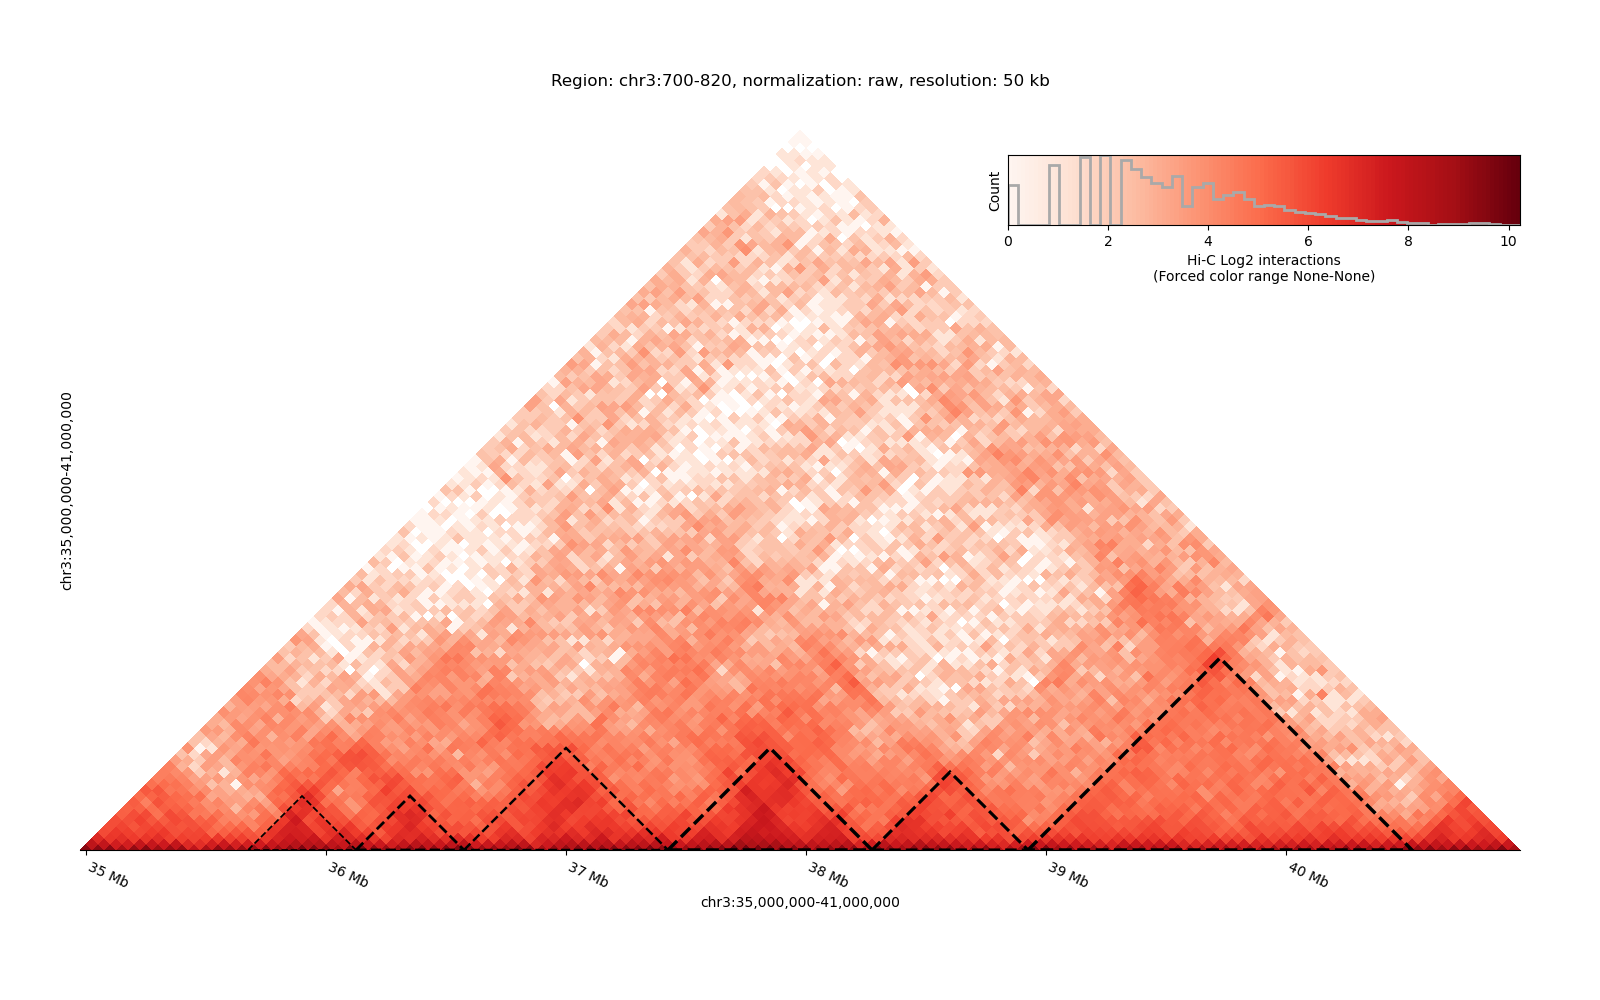

In [5]:
from IPython.display import Image
Image(filename='../results/B_rep1/05_sub-matrices/raw_chr3:700-820_50kb_c502e7ddb3_tri.png')

#### Mouse PSC cells

In [9]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-10-06 13:41:26]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-10-06 13:41:30]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-10-06 13:41:31]
      -> too few interactions defined as less than       100 interactions
      -> removed 65 columns (63/65 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-10-06 13:41:31]
  - Vanilla normalization                                                      [2021-10-06 13:41:31]
  - Getting sum of normalized bins                                             

In [1]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

,------.
| JOBs |
,----.-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------.---------------------.---------------------.-----------.----------------.
| Id |                                                              

CalledProcessError: Command 'b'\ntadbit segment -w ../results/PSC_rep1/ --only_tads \\\n    -r 50000 -C 12 \\\n    --chromosomes chr3\n'' returned non-zero exit status 1.

In [2]:
%%bash

ls ../results/PSC_rep1/06_segmentation/tads_50kb/

chr3_e0b2edc568.tsv


In [ ]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def ../results/PSC_rep1/06_segmentation/tads_50kb/chr3_e0b2edc568.tsv

In [3]:
%%bash

ls ../results/PSC_rep1/05_sub-matrices/

_tmp_sub-matrices_21498c49ac
norm_chr3:200-1400_25kb_56229b88ee.mat
nrm_chr3:200-1400_25kb_9643e1501d.png
nrm_chr3:200-1400_25kb_ac36591a31.mcool
nrm_chr3:3395-3545_10kb_5927cd6f7a_tri.png
nrm_chr3:3395-3545_10kb_66803e4ebd.abc
nrm_chr3:3395-3545_10kb_bab7be0e72.png
nrm_chr3:3395-3545_10kb_bbc3ec05c6.png
nrm_chr3:3395-3545_10kb_e89b5aa69f.png
raw_chr3:200-1400_25kb_ac36591a31.mcool
raw_chr3:3395-3545_10kb_bab7be0e72.png
raw_chr3:700-820_50kb_556ee50555_tri.png
raw_chr3_50kb_ae5b48f670.png


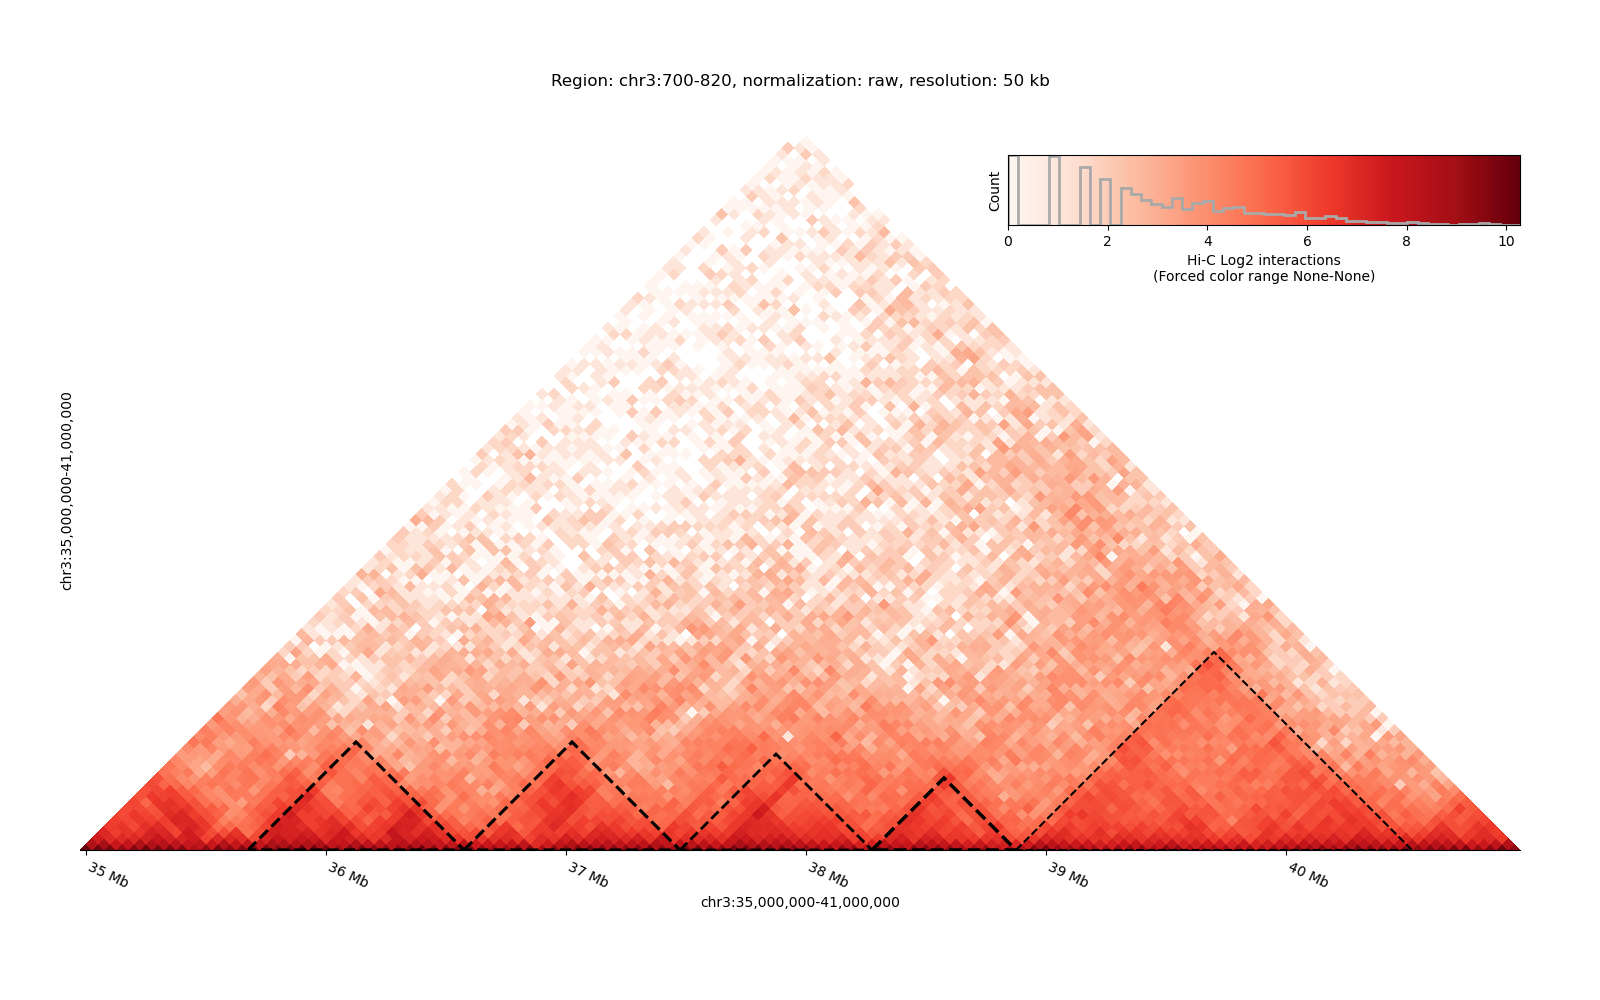

In [6]:
Image(filename='../results/PSC_rep1/05_sub-matrices/raw_chr3:700-820_50kb_556ee50555_tri.png')

### Questions

- What is the main difference between the identified TADs between B and PSC cells in the region chr3:35000000-41000000? How do you interpret that change in terms of genome structure?
- Would you feel confortable to describe to a collegue how TADs appear on a Hi-C contact map?
- Would you expect TADs to be easily detectable or quite dependent on which software is used for calling?